<a href="https://colab.research.google.com/github/Camty1/ENGS102_Final_Project/blob/main/ENGS102_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import random
class Player:
    def __init__(self, move_prob=.5):
        self.move_prob = move_prob
        self.earnings = 0
        self.move_history = []
        self.earnings_history = []

    # 0 is go to the bar, 1 is stay home
    def get_move(self):
        if random.random() < self.move_prob:
            return 0
        else:
            return 1

class Game:
    def __init__(self, minority_threshold=0.5, stay_home_payout=0, entry_fee=1, minority_payout=2, majority_payout=.5):
        self.player_list = []
        self.minority_threshold = minority_threshold
        self.stay_home_payout = stay_home_payout
        self.entry_fee = entry_fee
        self.minority_payout = minority_payout
        self.majority_payout = majority_payout
        self.num_players = 0

    def calc_nash_probability(self, n=None):
        if not n:
            n = self.num_players
        t = self.minority_threshold
        c = self.entry_fee
        x = self.minority_payout
        y = self.majority_payout

        return ((c - x)/(y - x)) ** (1/(n*t))

    def add_player(self, player):
        self.player_list.append(player)
        self.num_players += 1

    def play_round(self):
        moves = []
        moves_count = [0,0]
        bar_visitors = []

        for i in range(self.num_players):
            move = self.player_list[i].get_move()
            moves.append(move)
            moves_count[move] += 1

            if move == 0:
                self.player_list[i].earnings -= self.entry_fee
                bar_visitors.append(i)
            else:
                self.player_list[i].earnings += self.stay_home_payout

        if moves_count[0] <= (self.minority_threshold * self.num_players):
            for i in bar_visitors:
                self.player_list[i].earnings += self.minority_payout
        else:
            for i in bar_visitors:
                self.player_list[i].earnings += self.majority_payout

        for i in range(self.num_players):
            self.player_list[i].earnings_history.append(self.player_list[i].earnings)
            self.player_list[i].move_history.append(moves[i])


In [90]:
num_rounds = 100000
num_players = 3

game = Game(minority_threshold=(2/3))
p = game.calc_nash_probability(n=num_players)
print(p)
for i in range(num_players):
    game.add_player(Player(move_prob=p))

for i in range(num_rounds):
    game.play_round()


0.816496580927726


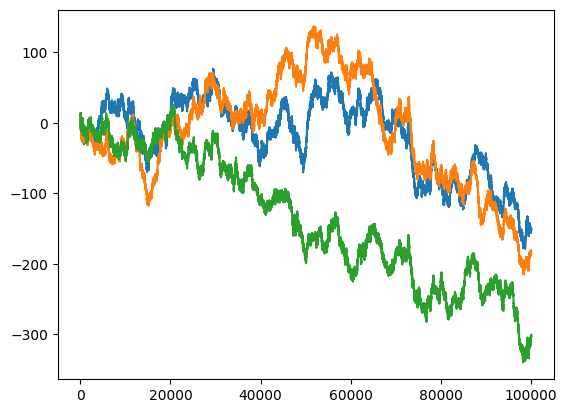

In [91]:
from matplotlib import pyplot as plt
for p in game.player_list:
    plt.plot(p.earnings_history)
plt.show()

In [ ]:
## Pseudo Code for finding Nash Equilibrium
